## DS-GA 1011 Assignment 1
## Haonan Tian ht1151@nyu.edu 
## 10/02/2018

In [368]:
import os
import sklearn
import spacy
import string
import random
import torch
import pickle as pkl
import numpy as np
import collections
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
from sklearn.model_selection import train_test_split

In [947]:
# Hyper-parameters
TOKEN_MODE = 'Plain'
NGRAM = 1
MAX_VOCAB_SIZE = 20000  # Set maximum vocabulary size
LEARNING_RATE = 0.01
NUM_EPOCHS = 4
EMBED_DIM = 100
OPTIMIZER = 'ADAM'
LAERNING_ANNEALING = 'YES'

### Data Preprocessing

In [7]:
# Initialize path to the directory where the files are stored
path_train_pos = '/train/pos'
path_train_neg = '/train/neg'
path_test_pos = '/test/pos'
path_test_neg = '/test/neg'
current_path = os.getcwd()

In [13]:
# Load files
train_pos = []
train_neg = []
test_pos = []
test_neg = []
os.chdir(current_path+path_train_pos)
for file in os.listdir():
    fin = open(file, 'r')
    train_pos.append(fin.read())
    fin.close()

os.chdir(current_path+path_train_neg)
for file in os.listdir():
    fin = open(file, 'r')
    train_neg.append(fin.read())
    fin.close()

os.chdir(current_path+path_test_pos)
for file in os.listdir():
    fin = open(file, 'r')
    test_pos.append(fin.read())
    fin.close()

os.chdir(current_path+path_test_neg)
for file in os.listdir():
    fin = open(file, 'r')
    test_neg.append(fin.read())
    fin.close()
    
# Check of the test has been correctly loaded
print('The length of the loaded files are train_pos {} train_neg {} test_pos {} test_neg {}'.format(len(train_pos),len(train_neg),len(test_pos),len(test_neg)))

The length of the loaded files are train_pos 12500 train_neg 12500 test_pos 12500 test_neg 12500


In [14]:
# Split the training set to training set and validation set
TRAIN_VAL_SPLIT = 10000
val_pos = []
val_neg = []
val_pos = train_pos[TRAIN_VAL_SPLIT:]
train_pos = train_pos[:TRAIN_VAL_SPLIT]
val_neg = train_neg[TRAIN_VAL_SPLIT:]
train_neg = train_neg[:TRAIN_VAL_SPLIT]

# Check the correctness of the split
print('The length of the loaded files are train_pos {} train_neg {} val_pos {} val_neg {}'.format(len(train_pos),len(train_neg),len(val_pos),len(val_neg)))

The length of the loaded files are train_pos 10000 train_neg 10000 val_pos 2500 val_neg 2500


In [26]:
# Combine positive and negative datasets
train_set = train_pos + train_neg
val_set = val_pos + val_neg
test_set = test_pos + test_neg

#### Plain Tokenization 

In [ ]:
# Set up tokenizer and filter to remove puntuations and standardize the tokens
tokenizer = spacy.load('en_core_web_sm')
punctuations = string.punctuation

# Set up tokenizer
def tokenize(inputStr):
    tokens = tokenizer(inputStr)
    return [token.text.lower() for token in tokens if (token.text not in punctuations)]

# Check the correctness
token_output = tokenize('This is A test for the preprocessing part, !!! to see if the tokenization works correctly!!!')
print(token_output)

#### Tokenize for Data Sets

In [28]:
# Tokenize all datasets
def tokenize_dataset(input_set):
    all_tokens = []
    set_tokens = []
    inner_counter = 1
    for review in input_set:
        token_temp = tokenize(review)
        all_tokens += token_temp
        set_tokens.append(token_temp)
        if inner_counter % 500 == 0:
            print('Finished tokenizing review {}'.format(inner_counter))
        inner_counter += 1
    return set_tokens, all_tokens

# Check the output of tokenization sets
train_tokens, all_tokens = tokenize_dataset(train_set)
print('The length of train_tokens and all_tokens are {} {}'.format(len(train_tokens),len(all_tokens)))

Finished tokenizing review 500
Finished tokenizing review 1000
Finished tokenizing review 1500
Finished tokenizing review 2000
Finished tokenizing review 2500
Finished tokenizing review 3000
Finished tokenizing review 3500
Finished tokenizing review 4000
Finished tokenizing review 4500
Finished tokenizing review 5000
Finished tokenizing review 5500
Finished tokenizing review 6000
Finished tokenizing review 6500
Finished tokenizing review 7000
Finished tokenizing review 7500
Finished tokenizing review 8000
Finished tokenizing review 8500
Finished tokenizing review 9000
Finished tokenizing review 9500
Finished tokenizing review 10000
Finished tokenizing review 10500
Finished tokenizing review 11000
Finished tokenizing review 11500
Finished tokenizing review 12000
Finished tokenizing review 12500
Finished tokenizing review 13000
Finished tokenizing review 13500
Finished tokenizing review 14000
Finished tokenizing review 14500
Finished tokenizing review 15000
Finished tokenizing review 155

In [29]:
# Perform tokenization for val_set and test_set
val_tokens, _ = tokenize_dataset(val_set)
print('The length of val_tokens is {}'.format(len(val_tokens)))

test_tokens, _ = tokenize_dataset(test_set)
print('The length of test_tokens is {}'.format(len(test_tokens)))

Finished tokenizing review 500
Finished tokenizing review 1000
Finished tokenizing review 1500
Finished tokenizing review 2000
Finished tokenizing review 2500
Finished tokenizing review 3000
Finished tokenizing review 3500
Finished tokenizing review 4000
Finished tokenizing review 4500
Finished tokenizing review 5000
The length of val_tokens is 5000
Finished tokenizing review 500
Finished tokenizing review 1000
Finished tokenizing review 1500
Finished tokenizing review 2000
Finished tokenizing review 2500
Finished tokenizing review 3000
Finished tokenizing review 3500
Finished tokenizing review 4000
Finished tokenizing review 4500
Finished tokenizing review 5000
Finished tokenizing review 5500
Finished tokenizing review 6000
Finished tokenizing review 6500
Finished tokenizing review 7000
Finished tokenizing review 7500
Finished tokenizing review 8000
Finished tokenizing review 8500
Finished tokenizing review 9000
Finished tokenizing review 9500
Finished tokenizing review 10000
Finished

In [31]:
# Store the three tokenized datasets into pickle files
os.chdir(current_path)
pkl.dump(train_tokens, open("train_tokens.p", "wb"))
pkl.dump(val_tokens, open("val_tokens.p", "wb"))
pkl.dump(test_tokens, open("test_tokens.p", "wb"))

# Store all tokens appered in training set into a pickle file 
pkl.dump(all_tokens, open("all_tokens.p", "wb"))

#### Set for n-gram

In [628]:
# Create function to tokenize for n-grams
from spacy.tokens.token import Token
def tokenize_ngram(inputStr, N):
    token_results = []
    tokens = tokenizer(inputStr)
    tokens = [token.text.lower() for token in tokens if (token.text not in punctuations)]
    counter = 0
    while counter < len(tokens)-N+1:
        temp = ''
        for i in range(N):
            temp += str(tokens[counter+i]) + ' '
        token_results.append(temp.strip(' '))
        
        counter += 1
    return token_results

# Check the correctness
token_output = tokenize_ngram('This is A test for the preprocessing part, !!! to see if the tokenization works correctly!!!',NGRAM)
print(token_output)

['this is a test', 'is a test for', 'a test for the', 'test for the preprocessing', 'for the preprocessing part', 'the preprocessing part to', 'preprocessing part to see', 'part to see if', 'to see if the', 'see if the tokenization', 'if the tokenization works', 'the tokenization works correctly']


In [629]:
# Tokenize all datasets for ngram
def tokenize_dataset_ngram(input_set, N):
    all_tokens = []
    set_tokens = []
    inner_counter = 1
    for review in input_set:
        token_temp = tokenize_ngram(review, N)
        all_tokens += token_temp
        set_tokens.append(token_temp)
        if inner_counter % 500 == 0:
            print('Finished tokenizing review {}'.format(inner_counter))
        inner_counter += 1
    return set_tokens, all_tokens

In [630]:
# Create tokens for N-grams N > 1
# NOTE: This may take more than an hour to run
N_GRAM = [2,3,4]
for N in N_GRAM:
    train_tokens, all_tokens = tokenize_dataset_ngram(train_set, N)
    val_tokens, _ = tokenize_dataset_ngram(val_set, N)
    test_tokens, _ = tokenize_dataset_ngram(test_set, N)
    os.chdir(current_path)
    pkl.dump(train_tokens, open("train_tokens_" + str(N) + ".p", "wb"))
    pkl.dump(val_tokens, open("val_tokens_" + str(N) + ".p", "wb"))
    pkl.dump(test_tokens, open("test_tokens_" + str(N) + ".p", "wb"))
    pkl.dump(all_tokens, open("all_tokens_" + str(N) + ".p", "wb"))
    print('\nFinished ' + str(N) + "gram\n")

Finished tokenizing review 500
Finished tokenizing review 1000
Finished tokenizing review 1500
Finished tokenizing review 2000
Finished tokenizing review 2500
Finished tokenizing review 3000
Finished tokenizing review 3500
Finished tokenizing review 4000
Finished tokenizing review 4500
Finished tokenizing review 5000
Finished tokenizing review 5500
Finished tokenizing review 6000
Finished tokenizing review 6500
Finished tokenizing review 7000
Finished tokenizing review 7500
Finished tokenizing review 8000
Finished tokenizing review 8500
Finished tokenizing review 9000
Finished tokenizing review 9500
Finished tokenizing review 10000
Finished tokenizing review 10500
Finished tokenizing review 11000
Finished tokenizing review 11500
Finished tokenizing review 12000
Finished tokenizing review 12500
Finished tokenizing review 13000
Finished tokenizing review 13500
Finished tokenizing review 14000
Finished tokenizing review 14500
Finished tokenizing review 15000
Finished tokenizing review 155

Finished tokenizing review 1500
Finished tokenizing review 2000
Finished tokenizing review 2500
Finished tokenizing review 3000
Finished tokenizing review 3500
Finished tokenizing review 4000
Finished tokenizing review 4500
Finished tokenizing review 5000
Finished tokenizing review 5500
Finished tokenizing review 6000
Finished tokenizing review 6500
Finished tokenizing review 7000
Finished tokenizing review 7500
Finished tokenizing review 8000
Finished tokenizing review 8500
Finished tokenizing review 9000
Finished tokenizing review 9500
Finished tokenizing review 10000
Finished tokenizing review 10500
Finished tokenizing review 11000
Finished tokenizing review 11500
Finished tokenizing review 12000
Finished tokenizing review 12500
Finished tokenizing review 13000
Finished tokenizing review 13500
Finished tokenizing review 14000
Finished tokenizing review 14500
Finished tokenizing review 15000
Finished tokenizing review 15500
Finished tokenizing review 16000
Finished tokenizing review 

In [98]:
# Extract stored N-Gram pickle and load into program
def extract_n_gram_tokens(N):
    os.chdir(current_path)
    train_tokens = pkl.load(open(current_path + "/train_tokens_" + str(N) + ".p", "rb"))
    val_tokens = pkl.load(open(current_path + "/val_tokens_" + str(N) + ".p", "rb"))
    test_tokens = pkl.load(open(current_path + "/test_tokens_" + str(N) + ".p", "rb"))
    all_tokens = pkl.load(open(current_path + "/all_tokens_" + str(N) + ".p", "rb"))
    return train_tokens, val_tokens, test_tokens, all_tokens

In [855]:
# Extract 1-gram token sets
train_tokens = pkl.load(open(current_path + "/train_tokens.p", "rb"))
val_tokens = pkl.load(open(current_path + "/val_tokens.p", "rb"))
test_tokens = pkl.load(open(current_path + "/test_tokens.p", "rb"))
all_tokens = pkl.load(open(current_path + "/all_tokens.p", "rb"))

In [587]:
# Extract 2-gram token sets
train_tokens, val_tokens, test_tokens, all_tokens = extract_n_gram_tokens(2)

In [631]:
# Extract 3-gram token sets
train_tokens, val_tokens, test_tokens, all_tokens = extract_n_gram_tokens(3)

In [635]:
# Extract 4-gram token sets
train_tokens, val_tokens, test_tokens, all_tokens = extract_n_gram_tokens(4)

In [856]:
print(Counter(all_tokens).most_common(10))

[('the', 261965), ('and', 130352), ('a', 128951), ('of', 116768), ('to', 107941), ('is', 87781), ('it', 74745), ('in', 74062), ('i', 66302), ('this', 58666)]


#### Advanced Tokenization

In [701]:
# Remove punctuations, stopwords and perform stemming
punctuations = string.punctuation
stopwords = set(stopwords.words('english'))
ps = PorterStemmer()

def tokenize_sentence_advanced(inputStr, N):
    token_results = []
    tokens = word_tokenize(inputStr)
    tokens = [ps.stem(token.lower()) for token in tokens if (token not in punctuations and token not in stopwords)]
    if N == 1:
        return tokens
    else:
        counter = 0
        while counter < len(tokens)-N+1:
            temp = ''
            for i in range(N):
                temp += str(tokens[counter+i]) + ' '
            token_results.append(temp.strip(' '))
            counter += 1
        return token_results
# Tokenize all datasets for ngram
def tokenize_dataset_ngram(input_set, N):
    all_tokens = []
    set_tokens = []
    inner_counter = 1
    for review in input_set:
        token_temp = tokenize_sentence_advanced(review, N)
        all_tokens += token_temp
        set_tokens.append(token_temp)
        if inner_counter % 500 == 0:
            print('Finished tokenizing review {}'.format(inner_counter))
        inner_counter += 1
    return set_tokens, all_tokens

In [ ]:
# Create Ngram advanced tokenization
for N in range(4):
    train_tokens, all_tokens = tokenize_dataset_ngram(train_set, N+1)
    val_tokens, _ = tokenize_dataset_ngram(val_set, N+1)
    test_tokens, _ = tokenize_dataset_ngram(test_set, N+1)
    os.chdir(current_path)
    pkl.dump(train_tokens, open("train_tokens_" + str(N+1) + '_ad' + ".p", "wb"))
    pkl.dump(val_tokens, open("val_tokens_" + str(N+1) + '_ad' + ".p", "wb"))
    pkl.dump(test_tokens, open("test_tokens_" + str(N+1) + '_ad' + ".p", "wb"))
    pkl.dump(all_tokens, open("all_tokens_" + str(N+1) + '_ad' + ".p", "wb"))
    print('\nFinished ' + str(N+1) + "gram\n")

In [702]:
# Extract stored N-Gram pickle and load into program
def extract_n_gram_tokens_ad(N):
    os.chdir(current_path)
    train_tokens = pkl.load(open(current_path + "/train_tokens_" + str(N) + '_ad' + ".p", "rb"))
    val_tokens = pkl.load(open(current_path + "/val_tokens_" + str(N) + '_ad' + ".p", "rb"))
    test_tokens = pkl.load(open(current_path + "/test_tokens_" + str(N) + '_ad' + ".p", "rb"))
    all_tokens = pkl.load(open(current_path + "/all_tokens_" + str(N) + '_ad' + ".p", "rb"))
    return train_tokens, val_tokens, test_tokens, all_tokens

In [954]:
# Extract 1-gram advanced token sets
train_tokens, val_tokens, test_tokens, all_tokens = extract_n_gram_tokens_ad(1)

In [770]:
# Extract 2-gram advanced token sets
train_tokens, val_tokens, test_tokens, all_tokens = extract_n_gram_tokens_ad(2)

In [811]:
# Extract 3-gram advanced token sets
train_tokens, val_tokens, test_tokens, all_tokens = extract_n_gram_tokens_ad(3)

In [845]:
# Extract 4-gram advanced token sets
train_tokens, val_tokens, test_tokens, all_tokens = extract_n_gram_tokens_ad(4)

In [846]:
print(Counter(all_tokens).most_common(10))

[('br br the film', 560), ("br br it 's", 535), ('br br thi movi', 383), ("i 've ever seen", 371), ('br br the movi', 356), ('br br the stori', 293), ('br br thi film', 287), ('br br the plot', 234), ('br br the act', 209), ("br br i n't", 203)]


#### Build Vocabulary 

In [955]:
# Reserve special index for padding and unknown words
PAD_IDX = 0
UNK_IDX = 1

# The method to build vocabulary
def build_vocab(all_tokens):
    token_counter = Counter(all_tokens)
    tokens, frequency = zip(*token_counter.most_common(MAX_VOCAB_SIZE))
    id2token = list(tokens)
    token2id = dict(zip(tokens, range(2,2+len(tokens))))
    id2token = ['<pad>', '<unk>'] + id2token
    token2id['<pad>'] = PAD_IDX 
    token2id['<unk>'] = UNK_IDX
    return id2token, token2id

id2token, token2id = build_vocab(all_tokens) 

In [956]:
print(len(id2token))

20002


In [957]:
# Lets check the dictionary by loading random token from it

random_token_id = random.randint(0, len(id2token)-1)
random_token = id2token[random_token_id]

print ("Token id {} ; token {}".format(random_token_id, id2token[random_token_id]))
print ("Token {}; token id {}".format(random_token, token2id[random_token]))

Token id 4522 ; token liberti
Token liberti; token id 4522


In [958]:
# Convert datasets in token format to index format
def convert_token_index(set_token, token2id, id2token):
    set_idx = []
    count = 0
    for review in set_token:
        temp_list = []
        temp_list = [token2id[token] if token in token2id else UNK_IDX for token in review]
        set_idx.append(temp_list)
        count += 1
        if count % 200 == 0:
            print('finished review NO ' + str(count))
    return set_idx

# Check the train_idx 
train_idx = convert_token_index(train_tokens, token2id, id2token)
print('The length of train_idx is {}'.format(len(train_idx)))

finished review NO 200
finished review NO 400
finished review NO 600
finished review NO 800
finished review NO 1000
finished review NO 1200
finished review NO 1400
finished review NO 1600
finished review NO 1800
finished review NO 2000
finished review NO 2200
finished review NO 2400
finished review NO 2600
finished review NO 2800
finished review NO 3000
finished review NO 3200
finished review NO 3400
finished review NO 3600
finished review NO 3800
finished review NO 4000
finished review NO 4200
finished review NO 4400
finished review NO 4600
finished review NO 4800
finished review NO 5000
finished review NO 5200
finished review NO 5400
finished review NO 5600
finished review NO 5800
finished review NO 6000
finished review NO 6200
finished review NO 6400
finished review NO 6600
finished review NO 6800
finished review NO 7000
finished review NO 7200
finished review NO 7400
finished review NO 7600
finished review NO 7800
finished review NO 8000
finished review NO 8200
finished review NO 8

In [959]:
# Convert val_tokens and test_tokens to idx sets
val_idx = convert_token_index(val_tokens, token2id, id2token)
print('The length of val_idx is {}'.format(len(val_idx)))

test_idx = convert_token_index(test_tokens, token2id, id2token)
print('The length of test_idx is {}'.format(len(test_idx)))

finished review NO 200
finished review NO 400
finished review NO 600
finished review NO 800
finished review NO 1000
finished review NO 1200
finished review NO 1400
finished review NO 1600
finished review NO 1800
finished review NO 2000
finished review NO 2200
finished review NO 2400
finished review NO 2600
finished review NO 2800
finished review NO 3000
finished review NO 3200
finished review NO 3400
finished review NO 3600
finished review NO 3800
finished review NO 4000
finished review NO 4200
finished review NO 4400
finished review NO 4600
finished review NO 4800
finished review NO 5000
The length of val_idx is 5000
finished review NO 200
finished review NO 400
finished review NO 600
finished review NO 800
finished review NO 1000
finished review NO 1200
finished review NO 1400
finished review NO 1600
finished review NO 1800
finished review NO 2000
finished review NO 2200
finished review NO 2400
finished review NO 2600
finished review NO 2800
finished review NO 3000
finished review NO

In [960]:
train_tokens[0]
train_idx[1]
#len(Counter(all_tokens))

[2558,
 1,
 678,
 13090,
 570,
 849,
 63,
 61,
 698,
 189,
 621,
 367,
 257,
 235,
 35,
 366,
 52,
 1433,
 448,
 829,
 33,
 39,
 2558,
 406,
 591,
 1621,
 46,
 2809,
 253,
 3748,
 3243,
 172,
 1822,
 1721,
 2826,
 9404,
 1621,
 181,
 348,
 37,
 17022,
 2,
 2,
 49,
 315,
 1789,
 96,
 621,
 1258,
 146,
 5088,
 319,
 197,
 109,
 3308,
 296,
 1156,
 1204,
 235,
 1998,
 19,
 4,
 12,
 2558,
 155,
 17023,
 6172,
 4,
 1,
 2,
 2,
 3388,
 2041,
 118,
 106,
 6172,
 42,
 957,
 73,
 235,
 113,
 341,
 17,
 1789,
 3508,
 2218,
 10452,
 13843,
 19,
 96,
 621,
 2495,
 116,
 146,
 5088,
 6172,
 2483,
 57,
 685,
 867,
 17,
 640,
 7,
 1789,
 4,
 6172,
 1343,
 621,
 13091,
 1932,
 5028,
 108,
 223,
 125,
 9,
 1038,
 4516,
 78,
 4,
 315,
 7716,
 1,
 1,
 4,
 405,
 9744,
 6172,
 374,
 20,
 281,
 188,
 185,
 3782,
 13092,
 1064,
 3022,
 1,
 119,
 2576,
 746,
 319,
 3309,
 3885,
 1790,
 3783,
 14638,
 8130,
 2112,
 442,
 82,
 621,
 158,
 117,
 2396,
 6172,
 9,
 78,
 4,
 82,
 990,
 4738,
 9405,
 12,
 957,
 4,
 3

In [643]:
def store_idx_set(train_idx, val_idx, test_idx, token_mode, n_gram, vocab_size, optimizer, current_path):
    os.chdir(current_path)
    pkl.dump(train_idx, open("train_idx_" + token_mode + ' ' + str(n_gram) + optimizer + ' ' + str(vocab_size) + ".p", "wb"))
    pkl.dump(val_idx, open("val_idx_" + token_mode + ' ' + str(n_gram) + optimizer + ' ' + str(vocab_size) + ".p", "wb"))
    pkl.dump(test_idx, open("test_idx_" + token_mode + ' ' + str(n_gram) + optimizer + ' ' + str(vocab_size) + ".p", "wb"))

In [644]:
store_idx_set(train_idx, val_idx, test_idx, TOKEN_MODE, NGRAM, MAX_VOCAB_SIZE, OPTIMIZER, current_path)

In [ ]:
def extract_idx_set(token_mode, n_gram, current_path):
    os.chdir(current_path)
    train_idx = pkl.load(open(current_path + "/train_idx_" + token_mode + ' ' + str(n_gram) + ".p", "rb"))
    val_idx = pkl.load(open(current_path + "/val_idx_" + token_mode + ' ' + str(n_gram) + ".p", "rb"))
    test_idx = pkl.load(open(current_path + "/test_idx_" + token_mode + ' ' + str(n_gram) + ".p", "rb"))
    return train_idx, val_idx, test_idx

In [711]:
# Create labels for data sets
def build_label(data_idx):
    label_neg = []
    label_pos = []
    for i in range(int(len(data_idx)/2)):
        label_pos.append(1)
        label_neg.append(0)
    return label_pos + label_neg

# Check label list for three sets 
train_label = build_label(train_idx)
val_label = build_label(val_idx)
test_label = build_label(test_idx)
print('The length of train label is {} the value between switch points are {} {}'.format(len(train_label), train_label[int(len(train_label)/2)-1], train_label[int(len(train_label)/2)]))
print('The length of val label is {} the value between switch points are {} {}'.format(len(val_label), val_label[int(len(val_label)/2)-1], val_label[int(len(val_label)/2)]))
print('The length of test label is {} the value between switch points are {} {}'.format(len(test_label), test_label[int(len(test_label)/2)-1], test_label[int(len(test_label)/2)]))

The length of train label is 20000 the value between switch points are 1 0
The length of val label is 5000 the value between switch points are 1 0
The length of test label is 25000 the value between switch points are 1 0


### Model Establishment

In [961]:
# Set up maximum sentence length for the use of standardizing matirx format later in the program
MAX_SENTENCE_LENGTH = 200

# Set up local class of dataset to use in this program 
from torch.utils.data import Dataset

class localDataset(Dataset):
    
    def __init__(self, data_idx, label_list):
        self.data_idx = data_idx
        self.label_list = label_list
        assert(len(self.data_idx) == len(self.label_list))
    def __len__(self):
        return len(self.data_idx)
    def __getitem__(self, key):
        review_idx = self.data_idx[key][:MAX_SENTENCE_LENGTH]
        label = self.label_list[key]
        return [review_idx, len(review_idx), label]

def collate_fn(batch):
    idx_list = []
    label_list = []
    length_list = []
    for review in batch:
        label_list.append(review[2])
        length_list.append(review[1])
        padded_review = np.pad(np.array(review[0]),pad_width=((0,MAX_SENTENCE_LENGTH-review[1])),mode="constant", constant_values=0)
        idx_list.append(padded_review)
    return [torch.from_numpy(np.array(idx_list)), torch.LongTensor(length_list), torch.LongTensor(label_list)]

In [962]:
# Create local dataset
train_dataset = localDataset(train_idx, train_label)
val_dataset = localDataset(val_idx, val_label)
test_dataset = localDataset(test_idx, test_label)

In [963]:
# Create data loader
BATCH_SIZE = 64
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=BATCH_SIZE,
                                           collate_fn=collate_fn,
                                           shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=collate_fn,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=collate_fn,
                                           shuffle=True)

In [964]:
CLASSIFIER_MODE = 'binary'
# Establish the BagOfWords Model
import torch.nn as nn
import torch.nn.functional as F

class BagOfWords(nn.Module):
    def __init__(self, review_length, embed_dim):
        super(BagOfWords, self).__init__()
        self.embedding = nn.Embedding(review_length, embed_dim, padding_idx = 0)
        self.linearReg = nn.Linear(embed_dim, 2)
    def forward(self, idx_list, length_list):
        embed_result_words = self.embedding(idx_list)
        embed_result_review = torch.sum(embed_result_words, dim = 1)
        embed_result = embed_result_review / length_list.view(length_list.size()[0],1).expand_as(embed_result_review).float()
        
        result = self.linearReg(embed_result.float())
        return result

#### Without Learning Annealing 

In [837]:
model = BagOfWords(len(id2token), EMBED_DIM)

In [838]:
# Train the model

# Criterion and Optimizer
criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
if OPTIMIZER == 'SGD':
    optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)
    
# Function for testing the model
def test_model(loader, model):
    correct = 0
    total = 0
    model.eval()
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        
        total += labels.size(0)
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
    return (100 * correct / total)

for epoch in range(NUM_EPOCHS):
    for i, (data, lengths, labels) in enumerate(train_loader):
        model.train()
        data_batch, length_batch, label_batch = data, lengths, labels
        optimizer.zero_grad()
        outputs = model(data_batch, length_batch)
        loss = criterion(outputs, label_batch)
        loss.backward()
        optimizer.step()
        # validate every 100 iterations
        if i > 0 and i % 100 == 0:
            # validate
            val_acc = test_model(val_loader, model)
            print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                       epoch+1, NUM_EPOCHS, i+1, len(train_loader), val_acc))

final_accuracy = test_model(val_loader, model)
print('Final Validation Acc: {}'.format(final_accuracy))

Epoch: [1/4], Step: [101/313], Validation Acc: 50.34
Epoch: [1/4], Step: [201/313], Validation Acc: 68.12
Epoch: [1/4], Step: [301/313], Validation Acc: 58.42
Epoch: [2/4], Step: [101/313], Validation Acc: 71.76
Epoch: [2/4], Step: [201/313], Validation Acc: 72.64
Epoch: [2/4], Step: [301/313], Validation Acc: 73.46
Epoch: [3/4], Step: [101/313], Validation Acc: 72.56
Epoch: [3/4], Step: [201/313], Validation Acc: 72.44
Epoch: [3/4], Step: [301/313], Validation Acc: 72.42
Epoch: [4/4], Step: [101/313], Validation Acc: 72.18
Epoch: [4/4], Step: [201/313], Validation Acc: 71.04
Epoch: [4/4], Step: [301/313], Validation Acc: 69.48
Final Validation Acc: 71.0


#### WIth Learning Rate Annealing

In [965]:
model = BagOfWords(len(id2token), EMBED_DIM)

In [966]:
from torch.optim.lr_scheduler import LambdaLR
lambda1 = lambda epoch: 0.1**epoch
# Criterion and Optimizer
criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
if OPTIMIZER == 'SGD':
    optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

    
scheduler = LambdaLR(optimizer, lr_lambda=[lambda1])
# Function for testing the model
def test_model(loader, model):
    correct = 0
    total = 0
    model.eval()
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        
        total += labels.size(0)
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
    return (100 * correct / total)

for epoch in range(NUM_EPOCHS):
    scheduler.step()
    for i, (data, lengths, labels) in enumerate(train_loader):
        #scheduler.step()
        model.train()
        data_batch, length_batch, label_batch = data, lengths, labels
        optimizer.zero_grad()
        outputs = model(data_batch, length_batch)
        loss = criterion(outputs, label_batch)
        loss.backward()
        optimizer.step()
        # validate every 100 iterations
        if i > 0 and i % 100 == 0:
            # validate
            val_acc = test_model(val_loader, model)
            print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                       epoch+1, NUM_EPOCHS, i+1, len(train_loader), val_acc))

final_accuracy = test_model(val_loader, model)
print('Final Validation Acc: {}'.format(final_accuracy))

Epoch: [1/4], Step: [101/313], Validation Acc: 83.6
Epoch: [1/4], Step: [201/313], Validation Acc: 84.76
Epoch: [1/4], Step: [301/313], Validation Acc: 83.54
Epoch: [2/4], Step: [101/313], Validation Acc: 84.24
Epoch: [2/4], Step: [201/313], Validation Acc: 84.2
Epoch: [2/4], Step: [301/313], Validation Acc: 84.4
Epoch: [3/4], Step: [101/313], Validation Acc: 84.48
Epoch: [3/4], Step: [201/313], Validation Acc: 84.44
Epoch: [3/4], Step: [301/313], Validation Acc: 84.44
Epoch: [4/4], Step: [101/313], Validation Acc: 84.42
Epoch: [4/4], Step: [201/313], Validation Acc: 84.42
Epoch: [4/4], Step: [301/313], Validation Acc: 84.42
Final Validation Acc: 84.42


In [202]:
# Output function to write the result to file
def result_output(test_loader, model, token_mode, n_gram, classifier_mode, current_path):
    os.chdir(current_path)
    fout = open('results.txt', 'a')
    accuracy = test_model(test_loader, model)
    fout.write('The accuracy for {} classifier {} {}gram tokenization is: {}'.format(classifier_mode, token_mode, str(n_gram), accuracy))
    fout.close()

In [933]:
def list_three_correct(loader, model):
    model.eval()
    correct_sample = []
    correct_label = []
    counter_c = 0
    
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        correction = list(predicted.eq(labels.view_as(predicted)))
        label = list(labels)
        data_content = list(data_batch)
        inner_counter = 0
        while inner_counter < len(correction):
            if correction[inner_counter] == 1:
                correct_sample.append(list(data_content[inner_counter].numpy()))
                correct_label.append(label[inner_counter].item())
                (data_content[inner_counter])
                inner_counter += 1
                counter_c += 1
                if counter_c == 3:
                    break
            else:
                inner_counter += 1
        break
    
    return correct_sample, correct_label

In [934]:
correct_sample, correct_label = list_three_correct(val_loader, model)
len(correct_dict)

3

In [936]:
fcorrect = open('three_correct_reviews.txt','w')
for i in range(3):
    fcorrect.write('The review: ' + str(correct_sample[i]) + ' is correctly labeled as ' + str(correct_label[i]) + '\n')
fcorrect.close()

In [938]:
def list_three_incorrect(loader, model):
    model.eval()
    correct_sample = []
    correct_label = []
    counter_c = 0
    
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        correction = list(predicted.eq(labels.view_as(predicted)))
        label = list(labels)
        data_content = list(data_batch)
        inner_counter = 0
        while inner_counter < len(correction):
            if correction[inner_counter] == 0:
                correct_sample.append(list(data_content[inner_counter].numpy()))
                correct_label.append(label[inner_counter].item())
                (data_content[inner_counter])
                inner_counter += 1
                counter_c += 1
                if counter_c == 3:
                    break
            else:
                inner_counter += 1
        break
    
    return correct_sample, correct_label

In [939]:
incorrect_sample, incorrect_label = list_three_incorrect(val_loader, model)

In [940]:
fincorrect = open('three_incorrect_reviews.txt','w')
for i in range(3):
    fincorrect.write('The review: ' + str(incorrect_sample[i]) + ' is incorrectly labeled as ' + str(incorrect_label[i]) + '\n')
fincorrect.close()

#### Running test set

In [952]:
model = BagOfWords(len(id2token), EMBED_DIM)

In [953]:
from torch.optim.lr_scheduler import LambdaLR
lambda1 = lambda epoch: 0.1**epoch
# Criterion and Optimizer
criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
if OPTIMIZER == 'SGD':
    optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

    
scheduler = LambdaLR(optimizer, lr_lambda=[lambda1])
# Function for testing the model
def test_model(loader, model):
    correct = 0
    total = 0
    model.eval()
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        
        total += labels.size(0)
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
    return (100 * correct / total)

for epoch in range(NUM_EPOCHS):
    scheduler.step()
    for i, (data, lengths, labels) in enumerate(train_loader):
        #scheduler.step()
        model.train()
        data_batch, length_batch, label_batch = data, lengths, labels
        optimizer.zero_grad()
        outputs = model(data_batch, length_batch)
        loss = criterion(outputs, label_batch)
        loss.backward()
        optimizer.step()
        # validate every 100 iterations
        if i > 0 and i % 100 == 0:
            # validate
            val_acc = test_model(val_loader, model)
            print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                       epoch+1, NUM_EPOCHS, i+1, len(train_loader), val_acc))

final_accuracy = test_model(test_loader, model)
print('Final Test Acc: {}'.format(final_accuracy))

Epoch: [1/4], Step: [101/313], Validation Acc: 81.72
Epoch: [1/4], Step: [201/313], Validation Acc: 82.42
Epoch: [1/4], Step: [301/313], Validation Acc: 84.18
Epoch: [2/4], Step: [101/313], Validation Acc: 84.06
Epoch: [2/4], Step: [201/313], Validation Acc: 84.08
Epoch: [2/4], Step: [301/313], Validation Acc: 84.26
Epoch: [3/4], Step: [101/313], Validation Acc: 84.16
Epoch: [3/4], Step: [201/313], Validation Acc: 84.32
Epoch: [3/4], Step: [301/313], Validation Acc: 84.26
Epoch: [4/4], Step: [101/313], Validation Acc: 84.2
Epoch: [4/4], Step: [201/313], Validation Acc: 84.2
Epoch: [4/4], Step: [301/313], Validation Acc: 84.24
Final Test Acc: 85.368


In [967]:
final_accuracy = test_model(test_loader, model)
print('Final Test Acc: {}'.format(final_accuracy))

Final Test Acc: 86.536


In [968]:
# plotting learning curve
model = BagOfWords(len(id2token), EMBED_DIM)

from torch.optim.lr_scheduler import LambdaLR
lambda1 = lambda epoch: 0.1**epoch
# Criterion and Optimizer
criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
if OPTIMIZER == 'SGD':
    optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

    
scheduler = LambdaLR(optimizer, lr_lambda=[lambda1])
# Function for testing the model
def test_model(loader, model):
    correct = 0
    total = 0
    model.eval()
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        
        total += labels.size(0)
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
    return (100 * correct / total)

training_example = []
learning_accu = []
record = 0
for epoch in range(NUM_EPOCHS):
    scheduler.step()
    for i, (data, lengths, labels) in enumerate(train_loader):
        #scheduler.step()
        model.train()
        record += len(list(data))
        data_batch, length_batch, label_batch = data, lengths, labels
        optimizer.zero_grad()
        outputs = model(data_batch, length_batch)
        loss = criterion(outputs, label_batch)
        loss.backward()
        optimizer.step()
        # validate every 100 iterations
        if i > 0 and i % 50 == 0:
            # validate
            val_acc = test_model(val_loader, model)
            print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                       epoch+1, NUM_EPOCHS, i+1, len(train_loader), val_acc))
            learning_accu.append(val_acc)
            training_example.append(record)



Epoch: [1/4], Step: [51/313], Validation Acc: 77.6
Epoch: [1/4], Step: [101/313], Validation Acc: 81.96
Epoch: [1/4], Step: [151/313], Validation Acc: 83.02
Epoch: [1/4], Step: [201/313], Validation Acc: 83.1
Epoch: [1/4], Step: [251/313], Validation Acc: 84.22
Epoch: [1/4], Step: [301/313], Validation Acc: 83.44
Epoch: [2/4], Step: [51/313], Validation Acc: 83.82
Epoch: [2/4], Step: [101/313], Validation Acc: 83.84
Epoch: [2/4], Step: [151/313], Validation Acc: 84.12
Epoch: [2/4], Step: [201/313], Validation Acc: 84.04
Epoch: [2/4], Step: [251/313], Validation Acc: 83.94
Epoch: [2/4], Step: [301/313], Validation Acc: 84.02
Epoch: [3/4], Step: [51/313], Validation Acc: 84.16
Epoch: [3/4], Step: [101/313], Validation Acc: 84.16
Epoch: [3/4], Step: [151/313], Validation Acc: 84.1
Epoch: [3/4], Step: [201/313], Validation Acc: 84.08
Epoch: [3/4], Step: [251/313], Validation Acc: 84.04
Epoch: [3/4], Step: [301/313], Validation Acc: 84.06
Epoch: [4/4], Step: [51/313], Validation Acc: 84.08


<Figure size 640x480 with 1 Axes>

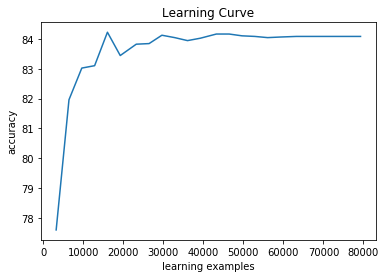

In [971]:
import matplotlib.pyplot as plt
import numpy as np
x = np.asarray(training_example)
y = np.asarray(learning_accu)
plt.plot(x, y)

#plt.xlim(5, 0)  # decreasing time

plt.xlabel('learning examples')
plt.ylabel('accuracy')
plt.title('Learning Curve')
#plt.grid(True)
plt.show()